### SVM Voice Classification
1) Read the dataset<br>
2) Remove/handle null values (if any)<br>
3) Depict percentage distribution of label on a pie chart<br>
4) Considering all the features as independent feature and 'label' as dependent feature, split the dataset into training and testing data with test size=20%<br>
5) Apply Support Vector Classifier on train data with different kernels and generate predictions on test data<br>
6) Also generate confusion_matrix and classification report for each of them<br>
7) Using Cross validation with 10 folds apply Support Vector Classifier and generate model accuracy and also compute mean accuracy
for linear, rbf and poly kernels separately<br>
8) Using C values in the range of 1-12 apply Cross validation for 4 folds for linear kernel and generate mean accuracy score. Plot C vs mean accuracy score on a line chart<br>
9) Using C values in the range of 1-12 apply Cross validation for 4 folds for rbf kernel and generate mean accuracy score. Plot C vs mean accuracy score on a line chart<br>
10) Using gamma values in the range given below apply Cross validation for 4 folds for rbf kernel and generate mean accuracy score. Plot gamma vs mean accuracy score on a line chart<br>
a) gamma_range = [0.0001,0.001,0.01,0.1,1,10,100]<br>
b) gamma_range = [0.01,0.02,0.03,0.04,0.05]<br>
11) Using degree values in the range of 1-6 apply Cross validation for 4 folds for poly kernel and generate mean accuracy score. Plot degree vs mean accuracy score on a line chart<br>

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [2]:
# 1. Read the dataset
df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
# 2. Remove/handle null values (if any)
df.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

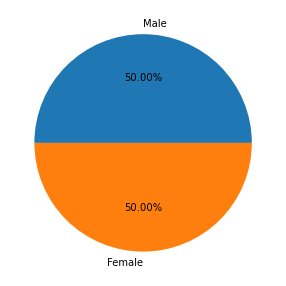

In [4]:
# 3. Depict percentage distribution of label on a pie chart
plt.figure(figsize=(7,5))
plt.pie(x=df.label.value_counts(),labels=['Male','Female'],autopct='%.2f%%');

In [5]:
# 4. Considering all the features as independent feature and 'label' as dependent feature, split the dataset into training and testing data with test size=20%
from sklearn.model_selection import train_test_split
X = df.drop(['label'],axis=1)
y = df.label
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((2534, 20), (2534,), (634, 20), (634,))

In [6]:
# 5. Apply Support Vector Classifier on train data with different kernels and generate predictions on test data
from sklearn.svm import SVC
preds = {} # stores the predictions made by model
models= {'Linear_SVC':SVC(kernel='linear'),
         'Polynomial_SVC':SVC(kernel='poly'),
         'RBF_SVC':SVC(kernel='rbf')}
for key, model in models.items():
    model.fit(X_train,y_train)
    model_preds = model.predict(X_test)
    preds[key] = model_preds

In [7]:
preds_df = pd.DataFrame(preds.values(),index=['Linear_Model','Polynomial_Model','RBF_Model'])
preds_df.T.head(10)

,Linear_Model,Polynomial_Model,RBF_Model
0,female,female,female
1,female,female,female
2,female,female,male
3,male,female,male
4,female,female,male
5,female,female,female
6,female,female,female
7,female,female,male
8,male,female,male
9,female,female,female


In [8]:
# 6. Also generate confusion_matrix and classification report for each of them
from sklearn.metrics import confusion_matrix, classification_report
print("For Linear Model:\n")
conf_mat_linear = confusion_matrix(y_test,preds['Linear_SVC'])
print(conf_mat_linear)
print(classification_report(y_test,preds['Linear_SVC']))
print()
print("For Polynomial Model:\n")
conf_mat_poly = confusion_matrix(y_test,preds['Polynomial_SVC'])
print(conf_mat_poly)
print(classification_report(y_test,preds['Polynomial_SVC']))
print()
print("For RBF Model:\n")
conf_mat_rbf = confusion_matrix(y_test,preds['RBF_SVC'])
print(conf_mat_rbf)
print(classification_report(y_test,preds['RBF_SVC']))

For Linear Model:

[[259  45]
 [  9 321]]
              precision    recall  f1-score   support

      female       0.97      0.85      0.91       304
        male       0.88      0.97      0.92       330

    accuracy                           0.91       634
   macro avg       0.92      0.91      0.91       634
weighted avg       0.92      0.91      0.91       634


For Polynomial Model:

[[300   4]
 [312  18]]
              precision    recall  f1-score   support

      female       0.49      0.99      0.66       304
        male       0.82      0.05      0.10       330

    accuracy                           0.50       634
   macro avg       0.65      0.52      0.38       634
weighted avg       0.66      0.50      0.37       634


For RBF Model:

[[164 140]
 [ 74 256]]
              precision    recall  f1-score   support

      female       0.69      0.54      0.61       304
        male       0.65      0.78      0.71       330

    accuracy                           0.66       634

In [9]:
# 7. Using Cross validation with 10 folds apply Support Vector Classifier and generate model accuracy and also compute mean accuracy for linear, rbf and poly kernels separately
from sklearn.model_selection import cross_val_score
linear_cv = np.mean(cross_val_score(estimator = models['Linear_SVC'],
                                    X = X,
                                    y = y,
                                    scoring='accuracy',
                                    cv=10,
                                    verbose=1))
poly_cv = np.mean(cross_val_score(estimator = models['Polynomial_SVC'],
                                  X = X,
                                  y = y,
                                  scoring='accuracy',
                                  cv=10,
                                  verbose=1))
rbf_cv = np.mean(cross_val_score(estimator = models['RBF_SVC'],
                                 X = X,
                                 y = y,
                                 scoring='accuracy',
                                 cv=10,
                                 verbose=1))
print('Mean Accuracy from Linear SVC Model: ',linear_cv)
print('Mean Accuracy from Polynomial SVC Model: ',poly_cv)
print('Mean Accuracy from RBF SVC Model: ',rbf_cv)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   29.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Mean Accuracy from Linear SVC Model:  0.9191909914946292
Mean Accuracy from Polynomial SVC Model:  0.5129297608114044
Mean Accuracy from RBF SVC Model:  0.658757936349479


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   12.3s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   22.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   52.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[0.9122474747474747, 0.9318181818181819, 0.9406565656565656, 0.9507575757575757, 0.9573863636363636, 0.9586489898989898, 0.9589646464646464, 0.9602272727272727, 0.9602272727272726, 0.9618055555555555, 0.9614898989898989]


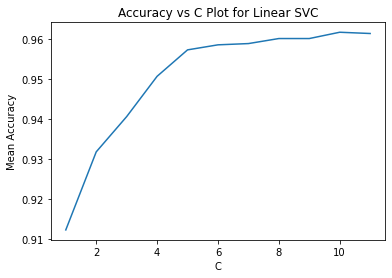

In [10]:
# 8. Using C values in the range of 1-12 apply Cross validation for 4 folds for linear kernel and generate mean accuracy 
# score. Plot C vs mean accuracy score on a line chart
C = np.arange(1,12)
linear_cv_C = []
for i in C:
    cvc = np.mean(cross_val_score(estimator=SVC(C=i,kernel='linear'),
                                  X = X,
                                  y = y,
                                  scoring='accuracy',
                                  cv = 4,
                                  verbose=1))
    linear_cv_C.append(cvc)
print(linear_cv_C)
plt.plot(C,linear_cv_C)
plt.xlabel("C")
plt.ylabel("Mean Accuracy")
plt.title("Accuracy vs C Plot for Linear SVC");

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[0.6410984848484849, 0.6515151515151515, 0.6515151515151516, 0.654040404040404, 0.65625, 0.6553030303030303, 0.6568813131313131, 0.6578282828282829, 0.6584595959595959, 0.6597222222222222, 0.6609848484848485]


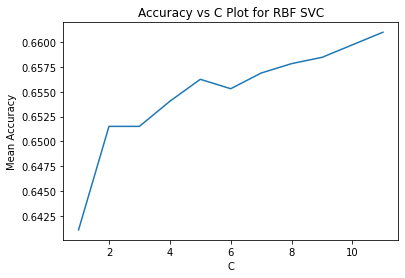

In [11]:
# 9. Using C values in the range of 1-12 apply Cross validation for 4 folds for rbf kernel and generate mean accuracy score.
# Plot C vs mean accuracy score on a line chart
C = np.arange(1,12)
rbf_cv_C = []
for i in C:
    cvc = np.mean(cross_val_score(estimator=SVC(C=i,kernel='rbf'),
                                  X = X,
                                  y = y,
                                  scoring='accuracy',
                                  cv = 4,
                                  verbose=1))
    rbf_cv_C.append(cvc)
print(rbf_cv_C)
plt.plot(C,rbf_cv_C)
plt.xlabel("C")
plt.ylabel("Mean Accuracy")
plt.title("Accuracy vs C Plot for RBF SVC");

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

[0.6537247474747474, 0.649621212121212, 0.6666666666666667, 0.6717171717171717, 0.6849747474747474, 0.678030303030303, 0.5170454545454546]


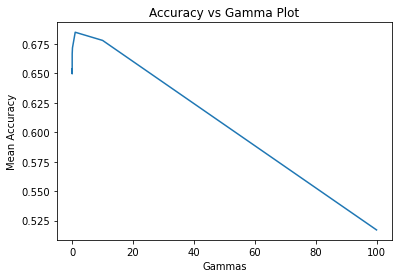

In [12]:
# 10. Using gamma values in the range given below apply Cross validation for 4 folds for rbf kernel and generate mean 
# accuracy score. Plot gamma vs mean accuracy score on a line chart
# a) gamma_range = [0.0001,0.001,0.01,0.1,1,10,100]
# b) gamma_range = [0.01,0.02,0.03,0.04,0.05]
gammas = [0.0001,0.001,0.01,0.1,1,10,100]
rbf_cv_g = []
for i in gammas:
    cvg = np.mean(cross_val_score(estimator=SVC(gamma=i,kernel='rbf'),
                                  X = X,
                                  y = y,
                                  scoring='accuracy',
                                  cv = 4,
                                  verbose=1))
    rbf_cv_g.append(cvg)
print(rbf_cv_g)
plt.plot(gammas,rbf_cv_g)
plt.xlabel("Gammas")
plt.ylabel("Mean Accuracy")
plt.title("Accuracy vs Gamma Plot");

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.3s finished


[0.6666666666666667, 0.6761363636363638, 0.6830808080808081, 0.6837121212121212, 0.6799242424242424]


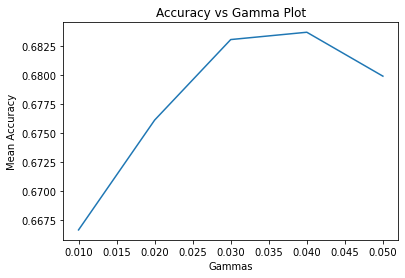

In [13]:
gammas = [0.01,0.02,0.03,0.04,0.05]
rbf_cv_g = []
for i in gammas:
    cvg = np.mean(cross_val_score(estimator=SVC(gamma=i,kernel='rbf'),
                                  X = X,
                                  y = y,
                                  scoring='accuracy',
                                  cv = 4,
                                  verbose=1))
    rbf_cv_g.append(cvg)
print(rbf_cv_g)
plt.plot(gammas,rbf_cv_g)
plt.xlabel("Gammas")
plt.ylabel("Mean Accuracy")
plt.title("Accuracy vs Gamma Plot");

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    9.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   53.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  4.7min finished


[0.509469696969697, 0.5170454545454546, 0.5135732323232323, 0.52114898989899, 0.5233585858585859]


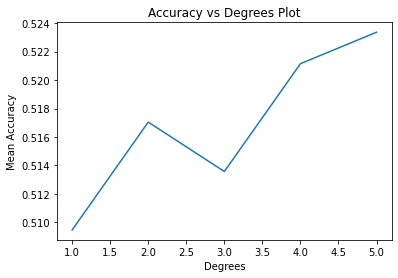

In [14]:
# 11. Using degree values in the range of 1-6 apply Cross validation for 4 folds for poly kernel and generate mean accuracy
# score. Plot degree vs mean accuracy score on a line chart
degrees = np.arange(1,6)
poly_cv_d = []
for i in degrees:
    cvd = np.mean(cross_val_score(estimator=SVC(kernel='poly',degree=i),
                                  X = X,
                                  y = y,
                                  scoring='accuracy',
                                  cv = 4,
                                  verbose=1))
    poly_cv_d.append(cvd)
print(poly_cv_d)
plt.plot(degrees,poly_cv_d)
plt.xlabel("Degrees")
plt.ylabel("Mean Accuracy")
plt.title("Accuracy vs Degrees Plot");